<h3>Importation des librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import test

#test.plot_data()

Requesting https://galilee.univ-reunion.fr/thredds//dodsC/dataStations/La_Reunion/urbsrn/2024/urbsrn_2024-03.nc
 -> Success.

List of variables:
 --> time: time (seconds since 1970-01-01T00:00:00)
 --> latitude: latitude (degrees_north)
 --> longitude: longitude (degrees_east)
 --> altitude: height (m)
 --> DHI_pu03_Avg: surface_diffuse_downwelling_shortwave_flux_in_air (W m-2)
 --> DHI_pu03_Max: surface_diffuse_downwelling_shortwave_flux_in_air (W m-2)
 --> DHI_pu03_Min: surface_diffuse_downwelling_shortwave_flux_in_air (W m-2)
 --> DHI_pu03_Std: surface_diffuse_downwelling_shortwave_flux_in_air (W m-2)
 --> DHI_qx03_Avg: surface_diffuse_downwelling_shortwave_flux_in_air (W m-2)
 --> DHI_qx03_Max: surface_diffuse_downwelling_shortwave_flux_in_air (W m-2)
 --> DHI_qx03_Min: surface_diffuse_downwelling_shortwave_flux_in_air (W m-2)
 --> DHI_qx03_Std: surface_diffuse_downwelling_shortwave_flux_in_air (W m-2)
 --> DNI_py03_Avg: surface_direct_downwelling_shortwave_flux_in_air (W m-2)
 -->

<h3>Chargement des fichiers CSV et Excel dans un DataFrame

In [2]:
df= pd.read_csv("C:/Users/delah/Travail/M1/S2/Stage Laboratoire M1/Nebulosit-nocturne-Reunion/Fichier excel/urbsrn_2024-02_donnnées_IR.csv", delimiter= ';')
dfT = pd.read_csv("C:/Users/delah/Travail/M1/S2/Stage Laboratoire M1/Nebulosit-nocturne-Reunion/Fichier excel/Data_TESS-W_02-2024.csv", delimiter= ';')
df_03_24 = pd.read_csv("C:/Users/delah/Travail/M1/S2/Stage Laboratoire M1/Fichier excel/urbsrn_2024-03.csv", delimiter= ';')
df_03_24T = pd.read_csv("C:/Users/delah/Travail/M1/S2/Stage Laboratoire M1/Fichier excel/Data_TESS-W_03_2024.csv", delimiter= ';')
calcul = pd.ExcelFile("C:/Users/delah/Travail/M1/S2/Stage Laboratoire M1/Nebulosit-nocturne-Reunion/Fichier excel/Calcul.xlsx")
def_Neb = pd.read_csv("C:/Users/delah/Travail/M1/S2/Stage Laboratoire M1/Nebulosit-nocturne-Reunion/Fichier excel/Calcul.csv", delimiter= ';')
dfT_C = pd.read_csv("C:/Users/delah/Travail/M1/S2/Stage Laboratoire M1/Nebulosit-nocturne-Reunion/Fichier excel/Data_TESS_CGR_hourfiltré.csv", delimiter= ';')

C:\Users\delah\AppData\Local\Temp\ipykernel_21048\294323362.py:6: DtypeWarning: Columns (0,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  def_Neb = pd.read_csv("C:/Users/delah/Travail/M1/S2/Stage Laboratoire M1/Nebulosit-nocturne-Reunion/Fichier excel/Calcul.csv", delimiter= ';')


<h3>Définition des données</h3>

<p>CRGE-4 02-2024

In [3]:
IR_aa03_Avg = df['IR_aa03_Avg'] # Rayonnement infrarouge CRG-4 1 récent
IR_qa03_Avg = df['IR_qa03_Avg'] # Rayonnement infrarouge CRG-4 2 ancien

# Définition du temps
df['DateTime'] = pd.to_datetime(df['day'] + ' ' + df['hour'], dayfirst = True)
Date = df['DateTime']

<p>TESS-W 02-2024

In [4]:
t_amb = dfT['tamb'] # Température ambiante en °C
t_sky = dfT['tsky'] # Température du ciel en °C
p_sky = dfT['psky'] # Puissance du ciel en W/m²

# Définition du temps
dfT['DateTimeT'] = pd.to_datetime(dfT['Day'] + ' ' + dfT['Hour'], dayfirst = True) 
DateT = dfT['DateTimeT']

CRG4 03-2024

In [5]:
IR_aa03_Avg_03_24 = df_03_24['IR_aa03_Avg'] # Rayonnement infrarouge CRG-4 1 récent
IR_qa03_Avg_03_24 = df_03_24['IR_qa03_Avg'] # Rayonnement infrarouge CRG-4 2 ancien

# Définition du temps
df_03_24['DateTime'] = pd.to_datetime(df_03_24['day'] + ' ' + df_03_24['hour'], dayfirst = True)
df_03_24_time = df_03_24.set_index(df_03_24['DateTime'])
Date_03_24 = df_03_24['DateTime']
df_03_24_time.head()

,day,hour,DHI_pu03_Avg,DHI_pu03_Max,DHI_pu03_Min,DHI_pu03_Std,DHI_qx03_Avg,DHI_qx03_Max,DHI_qx03_Min,DHI_qx03_Std,...,UIO_pz04_Max,UIO_pz04_Min,UIO_pz04_Std,UIO_qa03_Avg,WD_mq03_Avg,WD_mq03_Std,WSG_mq03_Max,WSG_mq03_Std,WS_mq03_Avg,DateTime
DateTime,,,,,,,,,,,,,,,,,,,,,
2024-03-01 00:00:00,01/03/2024,00:00,-1.140,-1.138,-1.242,0.013,-1.319,-1.303,-1.337,0.008,...,0.17,-0.34,0.143,-0.763,150.2,8.030,2.7,0.349,1.905,2024-03-01 00:00:00
2024-03-01 00:01:00,01/03/2024,00:01,-1.054,-1.035,-1.138,0.040,-1.318,-1.304,-1.334,0.006,...,0.17,-0.34,0.132,-0.763,141.0,21.930,2.7,0.432,1.665,2024-03-01 00:01:00
2024-03-01 00:02:00,01/03/2024,00:02,-1.014,-0.931,-1.035,0.041,-1.319,-1.308,-1.329,0.006,...,0.00,-0.34,0.130,-0.765,142.7,11.980,3.4,0.256,2.578,2024-03-01 00:02:00
2024-03-01 00:03:00,01/03/2024,00:03,-0.985,-0.931,-1.035,0.052,-1.308,-1.297,-1.322,0.005,...,0.00,-0.34,0.112,-0.763,162.1,6.658,3.1,0.215,2.555,2024-03-01 00:03:00
2024-03-01 00:04:00,01/03/2024,00:04,-0.937,-0.931,-1.035,0.023,-1.313,-1.297,-1.330,0.006,...,0.00,-0.34,0.127,-0.765,159.9,5.610,3.2,0.444,2.398,2024-03-01 00:04:00


TESS-W 03-2024

In [10]:
t_amb_03_24_K = df_03_24T['tamb'] + 273 # Température ambiante en Kelvin
t_sky_03_24_K = df_03_24T['tsky'] + 273 # Température du ciel en Kelvin

# Définition du temps
df_03_24T['DateTime'] = pd.to_datetime(df_03_24T['day'] + ' ' + df_03_24T['hour'], dayfirst = True)
df_03_24T_time = df_03_24T.set_index(df_03_24T['DateTime'])

P_tsky = (5.670374*10**-8)*((df_03_24T['tsky']+273)**4)
df_03_24T.head()

,day,hour_clean,hour,mag,tamb,tsky,tamb nuit,tsky nuit,IR_aa03_Avg,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,DateTime,DateTime_clean
DateTime_clean,,,,,,,,,,,,,,,,
2024-03-01 00:00:00,01/03/2024,00:00:00,00:00:48,18.69,26.25,9.74,NaN,NaN,367.9,NaN,NaN,NaN,NaN,NaN,2024-03-01 00:00:48,2024-03-01 00:00:00
2024-03-01 00:01:00,01/03/2024,00:01:00,00:01:49,18.69,26.25,9.76,NaN,NaN,367.9,NaN,NaN,NaN,NaN,NaN,2024-03-01 00:01:49,2024-03-01 00:01:00
2024-03-01 00:02:00,01/03/2024,00:02:00,00:02:49,18.68,26.25,9.84,NaN,NaN,367.7,NaN,NaN,NaN,NaN,NaN,2024-03-01 00:02:49,2024-03-01 00:02:00
2024-03-01 00:03:00,01/03/2024,00:03:00,00:03:49,18.68,26.27,9.91,NaN,NaN,367.9,NaN,NaN,NaN,NaN,NaN,2024-03-01 00:03:49,2024-03-01 00:03:00
2024-03-01 00:04:00,01/03/2024,00:04:00,00:04:50,18.67,26.29,9.90,NaN,NaN,367.7,NaN,NaN,NaN,NaN,NaN,2024-03-01 00:04:50,2024-03-01 00:04:00


In [16]:
df_03_24T['DateTime_clean'] = pd.to_datetime(df_03_24T['day'] + ' ' + df_03_24T['hour_clean'], dayfirst = True)
# Créer la colonne 'hour_clean' au format hh:mm:ss

# Utiliser 'hour_clean' comme index
df_03_24T.set_index(df_03_24T['DateTime_clean'], inplace=True)

# Vérifier la différence entre l'index et la colonne 'hour'
# Si une différence est trouvée, ajouter une ligne avec des NaN
if not df_03_24T.index.equals(df_03_24T['hour']):
    # Trouver les valeurs manquantes dans l'index
    missing_values = df_03_24T['hour'][~df_03_24T['hour'].isin(df_03_24T.index)]
    
    for missing_value in missing_values:
        # Créer une nouvelle ligne avec des NaN
        new_row = df_03_24T(index=[missing_value.strftime('%H:%M:%S')], columns=df_03_24T.columns)
        df_03_24T = pd.concat([df_03_24T, new_row])

AttributeError: 'str' object has no attribute 'astype'

<h3>Affichage des graphes</h3>

Affichage des graphes  pour les CRG4 03-2024

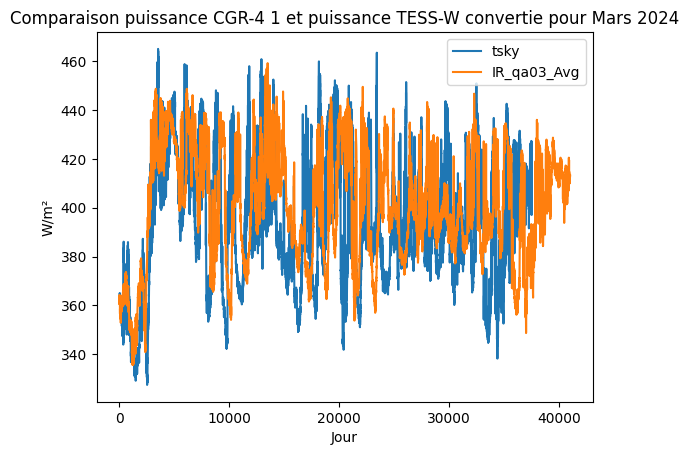

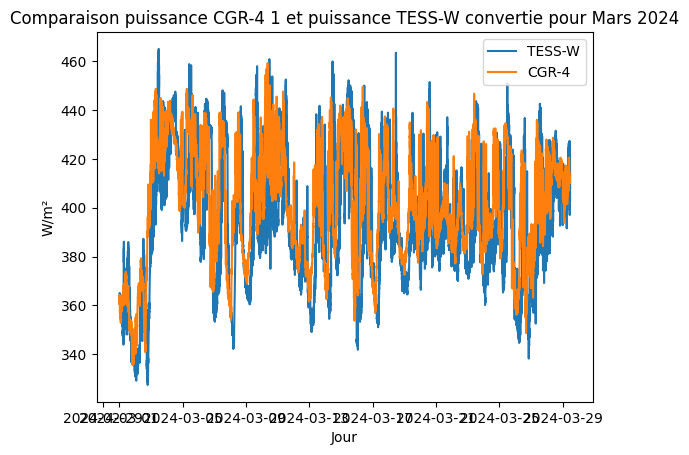

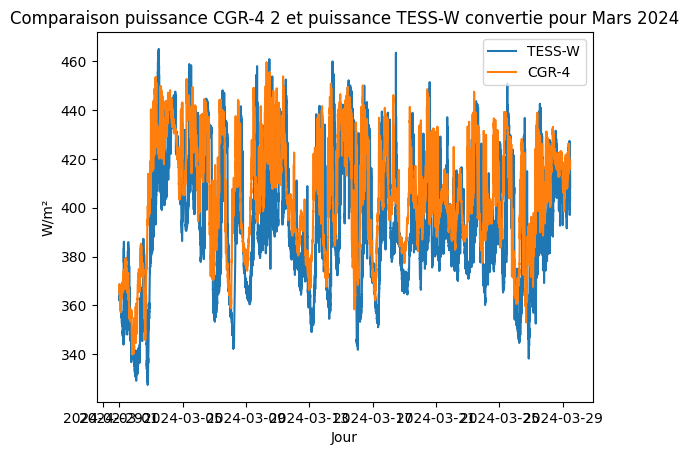

In [14]:
P_tsky.plot()
IR_qa03_Avg_03_24.plot()
plt.title('Comparaison puissance CGR-4 1 et puissance TESS-W convertie pour Mars 2024')
plt.xlabel('Jour')
plt.ylabel('W/m²')
plt.legend()
plt.show()

plt.plot(df_03_24T['DateTime'], 5.670374*10**-8*(t_sky_03_24_K)**4, label = 'TESS-W')
plt.plot(Date_03_24, IR_qa03_Avg_03_24, label = 'CGR-4')
plt.title('Comparaison puissance CGR-4 1 et puissance TESS-W convertie pour Mars 2024')
plt.xlabel('Jour')
plt.ylabel('W/m²')
plt.legend()
plt.show()

plt.plot(df_03_24T['DateTime'], 5.670374*10**-8*(t_sky_03_24_K)**4, label = 'TESS-W')
plt.plot(Date_03_24, IR_aa03_Avg_03_24, label = 'CGR-4')
plt.title('Comparaison puissance CGR-4 2 et puissance TESS-W convertie pour Mars 2024')
plt.xlabel('Jour')
plt.ylabel('W/m²')
plt.legend()

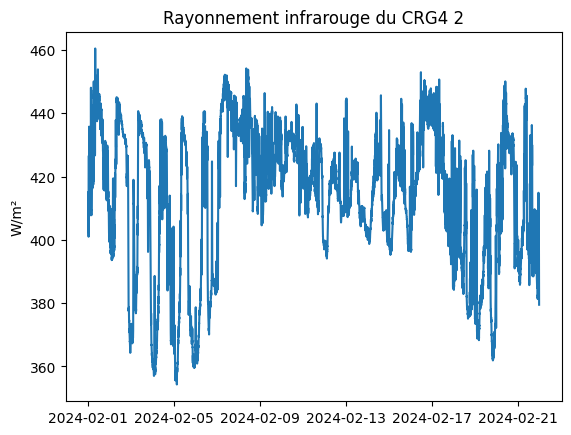

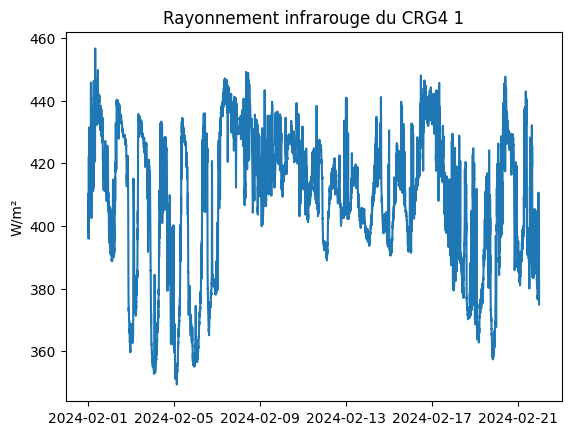

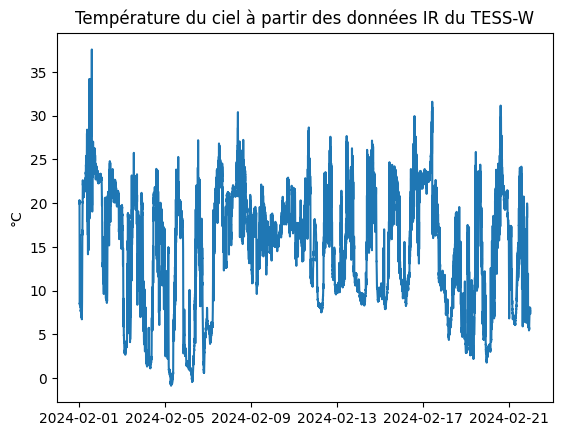

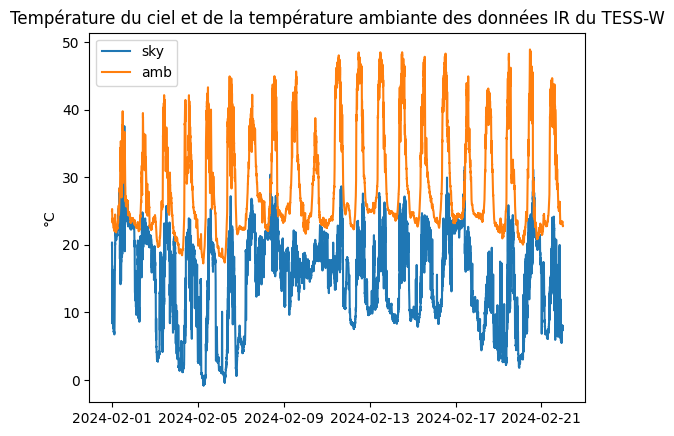

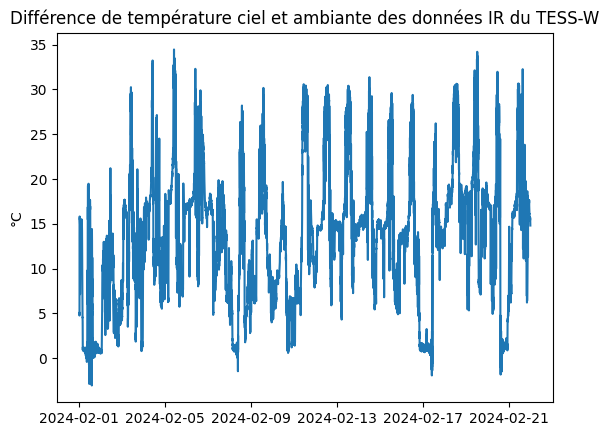

In [72]:
plt.plot(Date, IR_aa03_Avg)
plt.title('Rayonnement infrarouge du CRG4 2')
plt.ylabel('W/m²')
plt.show()

plt.plot(Date, IR_qa03_Avg)
plt.title('Rayonnement infrarouge du CRG4 1')
plt.ylabel('W/m²')
plt.show()

plt.plot(DateT, t_sky, label='sky')
plt.title('Température du ciel à partir des données IR du TESS-W')
plt.ylabel('°C')
plt.show()

plt.plot(DateT, t_sky, label='sky')
plt.plot(DateT, t_amb, label='amb')
plt.title('Température du ciel et de la température ambiante des données IR du TESS-W')
plt.ylabel('°C')
plt.legend()
plt.show()

plt.plot(DateT, t_amb - t_sky)
plt.title('Différence de température ciel et ambiante des données IR du TESS-W')
plt.ylabel('°C')
plt.show()

# plt.plot(DateT, p_sky_e)
# plt.show()

# plt.plot(Date, IR_aa03_Avg)
# plt.plot(DateT, p_sky_e)
# plt.title('Données CRG4 et TESS-W')

<h3>Pourcentage Nébulosité nocturne 03-2024

(0.0, 100.0)

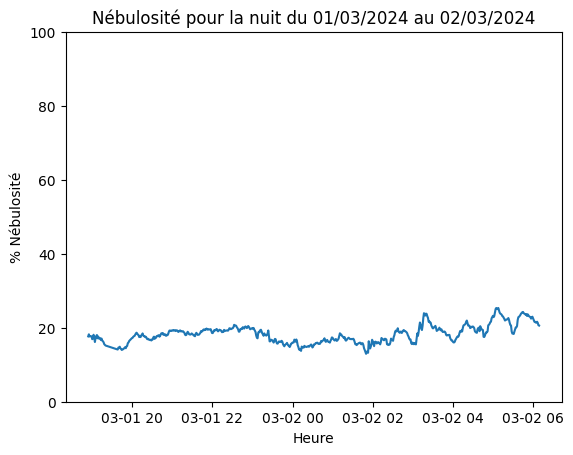

In [ ]:
Pourcentage = def_Neb['Pourcentage']
plt.plot(Date_03_24T[1106:1761], Pourcentage[1106:1761])
plt.title("Nébulosité pour la nuit du 01/03/2024 au 02/03/2024")
plt.xlabel('Heure')
plt.ylabel('% Nébulosité')
plt.ylim(0,100)

(0.0, 100.0)

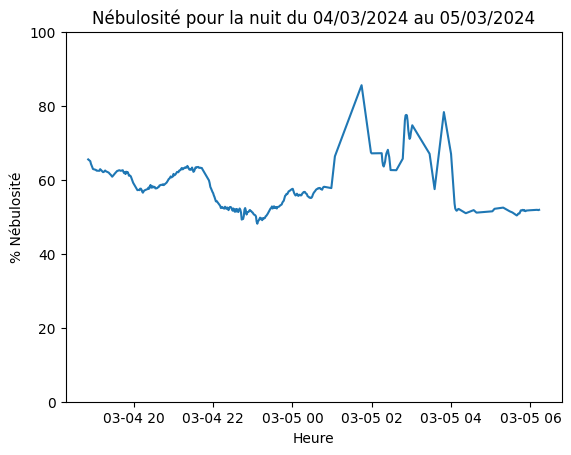

In [ ]:
Pourcentage = def_Neb['Pourcentage']
plt.plot(Date_03_24T[5354:5720], Pourcentage[5354:5720])
plt.title("Nébulosité pour la nuit du 04/03/2024 au 05/03/2024")
plt.xlabel('Heure')
plt.ylabel('% Nébulosité')
plt.ylim(0,100)

<h3>Test code

In [ ]:
for sheet_name in calcul.sheet_names:
    df_Neb = pd.read_excel(calcul, sheet_name= "Données Tess Nuit 03-24")
    
    df_Neb['DateTime'] = pd.to_datetime(df_Neb['day_datetime'] + ' ' + df_Neb['hour_str'], dayfirst=True)
    Pourcentage = df_Neb['Pourcentage']
    
    plt.plot(df_Neb['hour'], Pourcentage)

In [77]:
# exemple: représentation de l'évolution mensuelle de la température 
STANDARD_NAME = "surface_downwelling_shortwave_flux_in_air"

# Searching for variable by standard name
varname = next((name for name, var in ncfile.variables.items() if hasattr(var, 'standard_name') and var.standard_name == STANDARD_NAME), None)

if not varname:
    print(f"Error: Unable to find variable with standard name '{STANDARD_NAME}' in file: {url}")
    ncfile.close()
    sys.exit(1)

# Extracting parameters
latitude = ncfile.variables['latitude'][:]
longitude = ncfile.variables['longitude'][:]
altitude = ncfile.variables['altitude'][:]

# Extracting time
time_unix = ncfile.variables['time'][:]
var_array = np.array(ncfile.variables[varname][:])

# Converting time to human-readable format
time_array = np.array([datetime.fromtimestamp(t) for t in time_unix])

# Set figure parameters
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0.01

# Plotting the parameter against time
plt.plot(time_array, var_array)
plt.xlabel('Time [UTC]')
plt.ylabel(f"{ncfile.variables[varname].long_name} ({ncfile.variables[varname].units})")
plt.title(f"{varname} for {params['STATION']} - {params['YEAR']}/{params['MONTH']}")
plt.show()

NameError: name 'ncfile' is not defined

<Axes: >

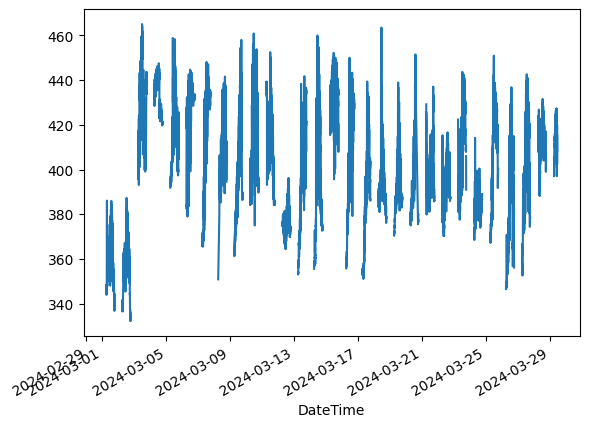

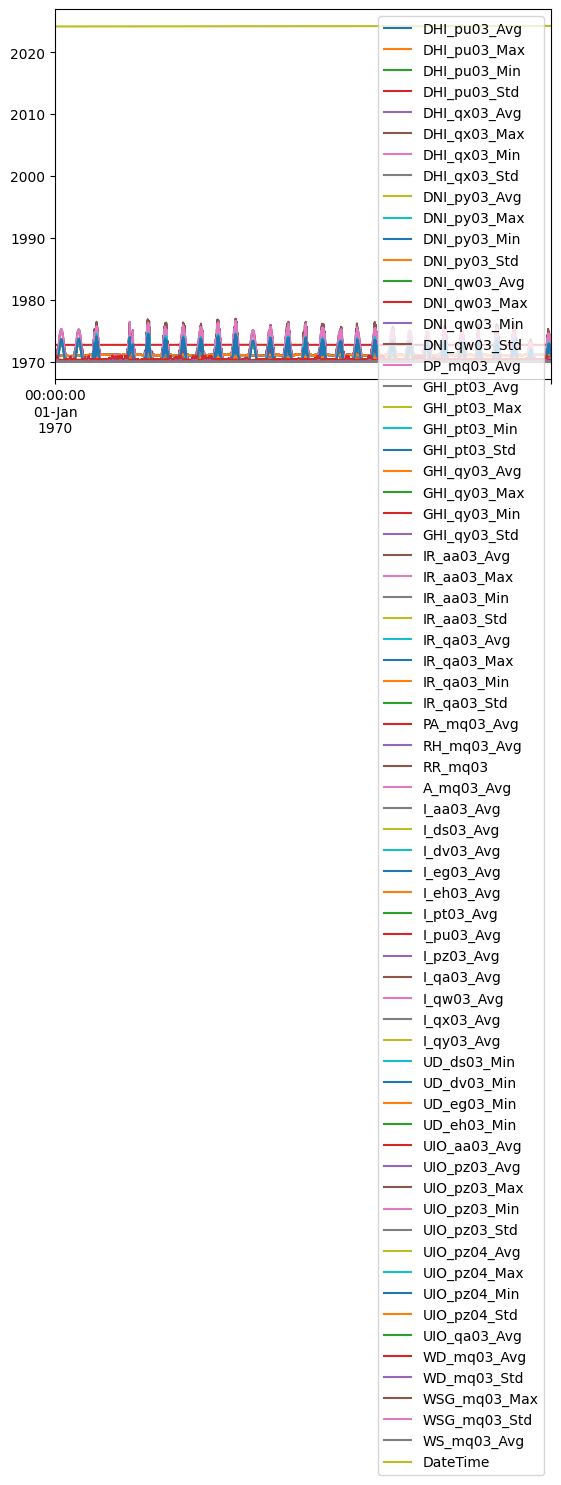

In [59]:
df_03_24T.index = pd.to_datetime(df_03_24T['DateTime'])
df_03_24T

d_test = (5.670374*10**-8)*((df_03_24T['tsky nuit']+273)**4)
d_test.plot()

df_03_24

df_03_24.plot()

In [11]:
#dfT_C['DateTime'] = pd.to_datetime(dfT_C['day'] + ' ' + dfT_C['hour'],  dayfirst = True)
df_03_24T.index = pd.to_datetime(df_03_24T['DateTime'])
dfT_C.set_index(dfT_C['day'])
dfT_C['IR_aa03_Avg'].plot()

ValueError: time data "13/03/2024" doesn't match format "%m/%d/%Y", at position 12. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.